**Importing all the necessary python packages**

Refer to [pycaret documentation](https://pycaret.readthedocs.io/en/latest/index.html) for help with installing pycaret.

In [1]:
import pycaret
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import *

**The following block replaces the variables with the speed denstiy model variables**

train = pd.read_csv('datasets/train.csv', usecols = ['air_wt_real_ug','air_wt_SMAP_ug', 'SMAP', 'RPM', 
                                                    'CHT_K', 'MAT_K', 'TPS'])
test = pd.read_csv('n282_data3/11_preprocess_4.csv', 
                   usecols = ['air_wt_real_ug', 'air_wt_SMAP_ug', 'SMAP', 'RPM', 'CHT_K', 'MAT_K', 'TPS'])
train['VE1'] = train['air_wt_SMAP_ug']*train['SMAP']
train['VE2'] = train['air_wt_SMAP_ug']*train['RPM']
train = train.drop(columns=['air_wt_SMAP_ug', 'SMAP', 'RPM', 'CHT_K', 'MAT_K', 'TPS'])

Importing dataset with multiple cold datapoints. 

In [21]:
train = pd.read_csv('datasets/train_repeat10.csv',usecols=['air_wt_real_ug','SMAP','MAT_K', 'RPM', 'CHT_K','TPS']) # ,'MAT_K'

In [22]:
exp_reg101 = setup(data = train, target = 'air_wt_real_ug',  normalize = True, fold = 5, normalize_method = "minmax", 
                 session_id=123) # remove_multicollinearity=True, multicollinearity_threshold=0.9

In [4]:
compare_models(round = 3, sort = 'MSE')

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [28]:
lr = create_model('lr')
print(lr.coef_)
print(lr.intercept_)
print(lr.get_params)

[ 62.859158    -0.23686314 -18.494648  ]
34.03125
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)>


In [23]:
best = create_model('dt', ccp_alpha = 0.3)
# print(best.coef_)
# print(best.intercept_)
# print(best.get_params)

In [24]:
print(best.get_depth())
print(best.get_n_leaves())
best.get_params()

6
14


{'ccp_alpha': 0.3,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 123,
 'splitter': 'best'}

In [30]:
# plot_tree(best)
# plt.show()
text_representation = export_text(best, feature_names = ['SMAP','MAT_K', 'RPM', 'CHT_K','TPS'])
print(text_representation)

|--- SMAP <= 0.29
|   |--- SMAP <= 0.18
|   |   |--- value: [35.23]
|   |--- SMAP >  0.18
|   |   |--- value: [37.68]
|--- SMAP >  0.29
|   |--- TPS <= 0.70
|   |   |--- CHT_K <= 0.63
|   |   |   |--- SMAP <= 0.45
|   |   |   |   |--- RPM <= 0.04
|   |   |   |   |   |--- MAT_K <= 0.12
|   |   |   |   |   |   |--- value: [62.78]
|   |   |   |   |   |--- MAT_K >  0.12
|   |   |   |   |   |   |--- value: [57.67]
|   |   |   |   |--- RPM >  0.04
|   |   |   |   |   |--- value: [50.24]
|   |   |   |--- SMAP >  0.45
|   |   |   |   |--- value: [59.74]
|   |   |--- CHT_K >  0.63
|   |   |   |--- TPS <= 0.41
|   |   |   |   |--- RPM <= 0.74
|   |   |   |   |   |--- value: [40.25]
|   |   |   |   |--- RPM >  0.74
|   |   |   |   |   |--- value: [45.96]
|   |   |   |--- TPS >  0.41
|   |   |   |   |--- CHT_K <= 0.69
|   |   |   |   |   |--- value: [63.07]
|   |   |   |   |--- CHT_K >  0.69
|   |   |   |   |   |--- value: [53.97]
|   |--- TPS >  0.70
|   |   |--- CHT_K <= 0.93
|   |   |   |--- SM

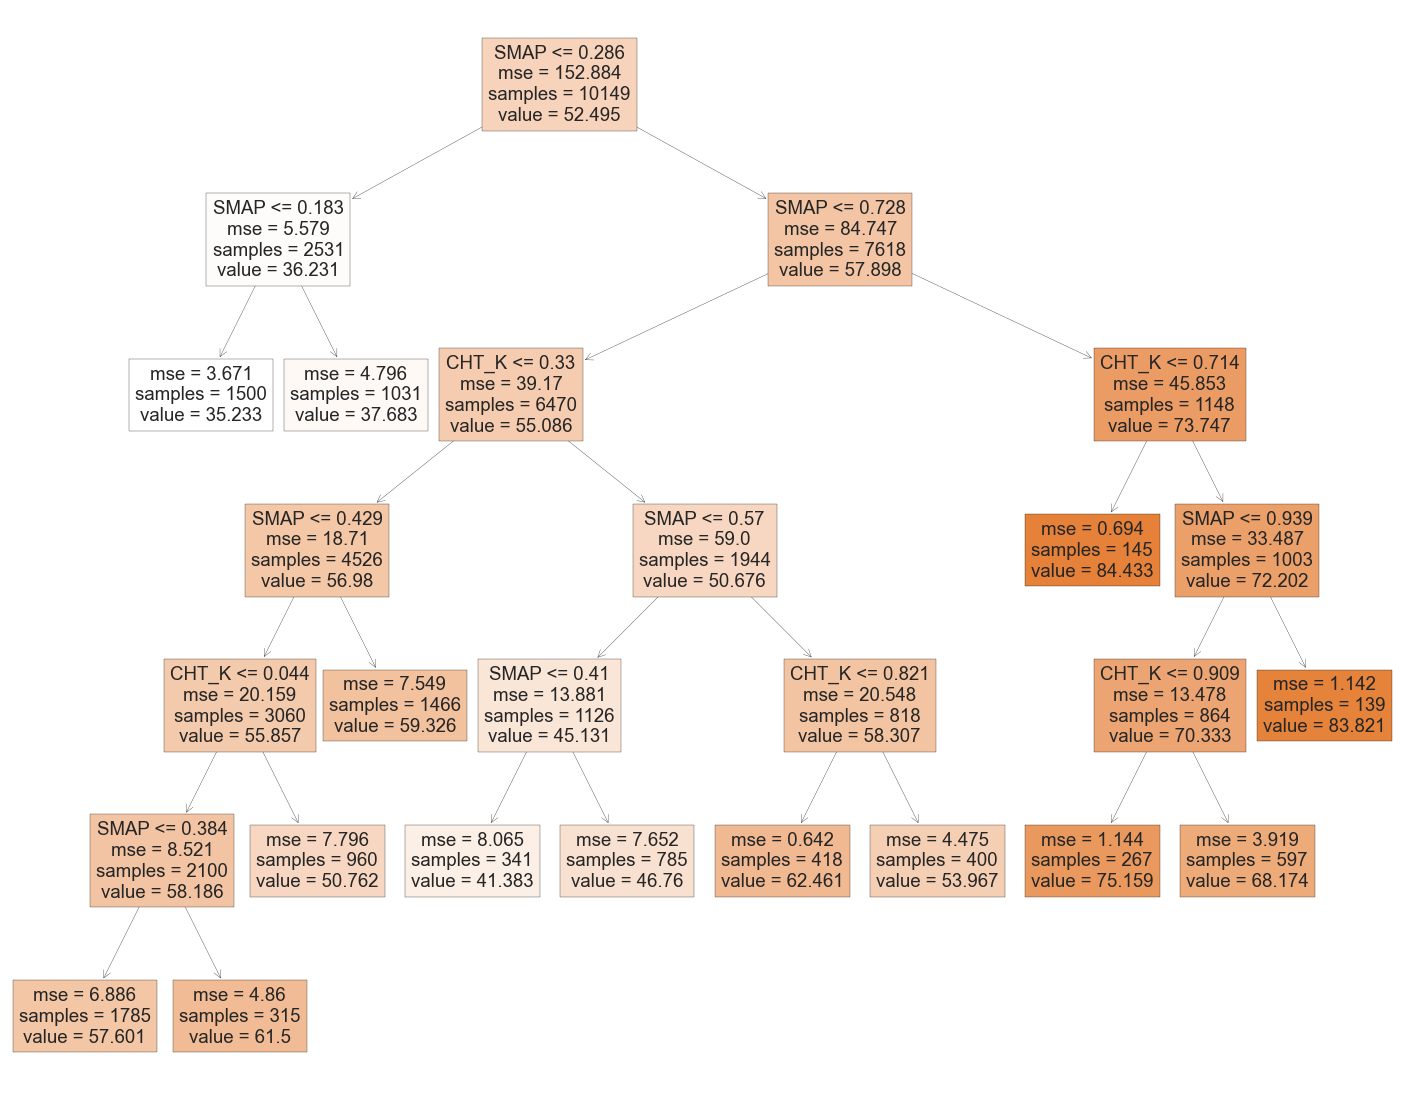

In [20]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(best, feature_names=['SMAP', 'CHT_K', 'TPS'], filled=True) 
plt.savefig('tree.png',format='png',bbox_inches = "tight")

In [10]:
# tuned_best = tune_model(best, optimize = 'MSE')
# print(tuned_best.coef_)
# print(tuned_best.intercept_)
# print(tuned_best.get_params)

In [31]:
evaluate_model(best, use_train_data=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<AxesSubplot:ylabel='residual'>

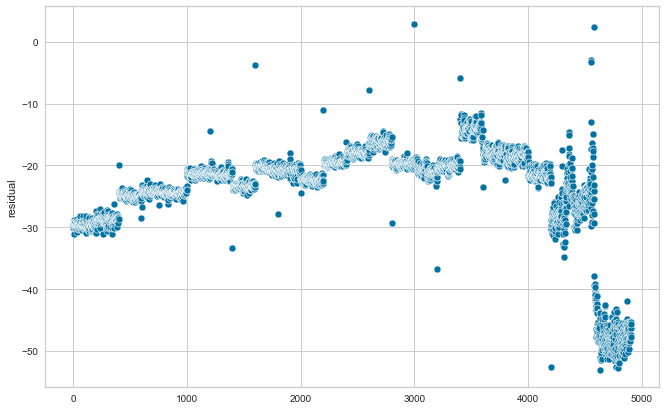

In [12]:
train_RG = pd.read_csv('datasets/train_RG.csv', usecols = ['air_wt_real_ug', 'air_wt_RG'])
train_RG['residual'] = train_RG.air_wt_real_ug - train_RG.air_wt_RG
plt.rcParams['figure.figsize'] = (11,7)
sns.scatterplot(x = train_RG.index, y = "residual", palette = "rocket", data = train_RG) 

In [13]:
predict_model(lr)

SMAP       RPM     CHT_K     MAT_K  air_wt_real_ug      Label
0     0.376176  0.127989  0.023838  0.018100       60.383289  56.917316
1     0.365141  0.128638  0.047676  0.018100       54.730835  55.859707
2     0.186170  0.068768  0.460866  0.180996       36.056744  37.448250
3     0.884242  0.996342  0.984108  1.000000       69.160004  70.899902
4     0.479008  0.287719  0.174811  0.054299       58.672314  61.262489
...        ...       ...       ...       ...             ...        ...
4346  0.071935  0.054035  0.580055  0.289593       50.174656  27.706532
4347  0.473596  0.287551  0.174811  0.054299       55.735493  60.908997
4348  0.988440  0.666169  0.960270  0.930015       83.538429  78.511253
4349  0.475645  0.322788  0.190703  0.054299       57.776291  60.809692
4350  0.228785  0.060553  0.580055  0.289593       38.855865  37.950272

[4351 rows x 6 columns]

In [14]:
sns.set(style = 'darkgrid')
sns.histplot(data = train, x = 'MAT_K', stat = 'probability', kde = 1)

<AxesSubplot:xlabel='MAT_K', ylabel='Probability'>

In [15]:
sns.histplot(data = train, x = 'CHT_K', stat = 'probability', kde = 1)

<AxesSubplot:xlabel='CHT_K', ylabel='Probability'>

<AxesSubplot:xlabel='RPM', ylabel='Probability'>

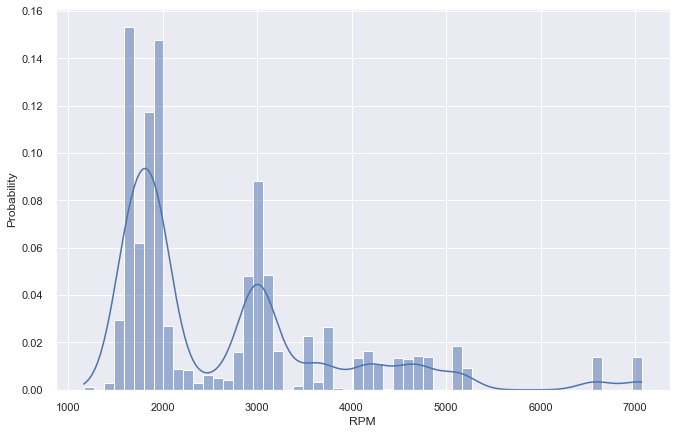

In [16]:
sns.histplot(data = train, x = 'RPM', stat = 'probability', kde = 1)

<AxesSubplot:xlabel='SMAP', ylabel='Probability'>

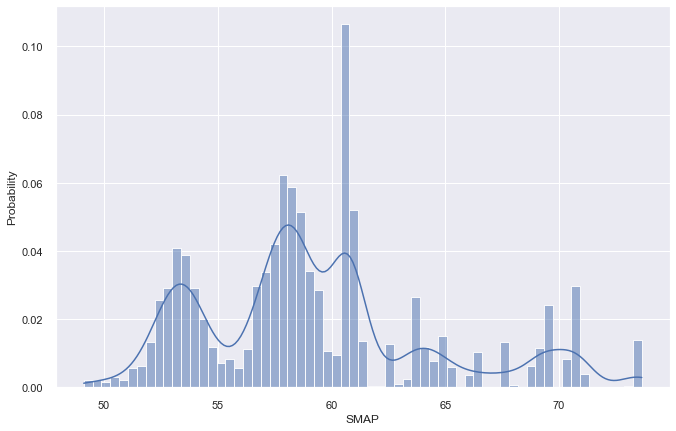

In [17]:
sns.histplot(data = train, x = 'SMAP', stat = 'probability', kde = 1)

<AxesSubplot:xlabel='air_wt_real_ug', ylabel='Probability'>

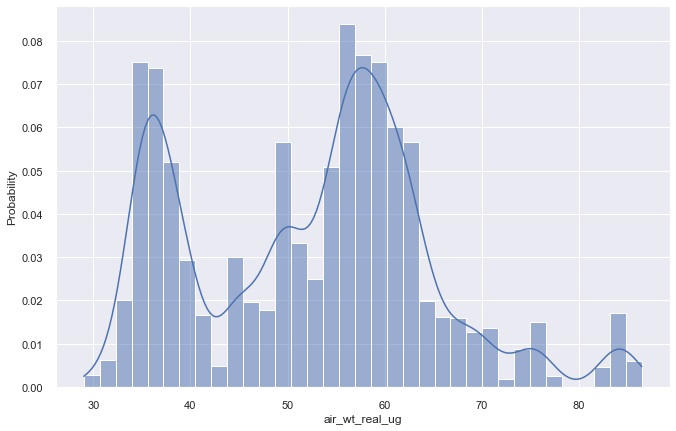

In [18]:
sns.histplot(data = train, x = 'air_wt_real_ug', stat = 'probability', kde = 1)

In [19]:
sns.histplot(data = train, x = 'TPS', stat = 'probability', kde = 1)

<AxesSubplot:xlabel='TPS', ylabel='Probability'>

In [20]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
lightgbm    Light Gradient Boosting Machine   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True